In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr
from scipy.stats import norm
import seaborn as sns

npr.seed(20)

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [3]:
N=500
std=1

#generate data
gaus = npr.normal(0,std,(N,))

Histogram area:  269.1021961112662
New distribution area:  499.84070114158766
Normalized integral:  269.10219611126627


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


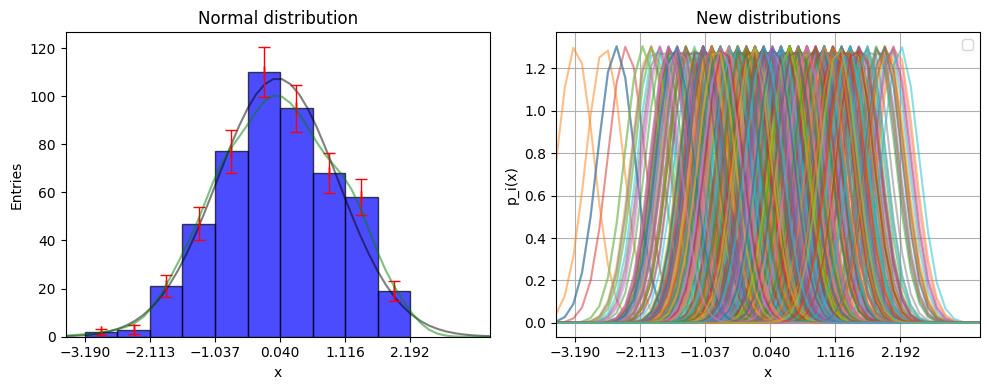

In [4]:
#create the subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(10, 4))

#plot hist
values, bin, _ = ax1.hist(gaus, bins=10, alpha=0.7, color='blue', edgecolor='black')
area = sum(np.diff(bin)*values)
lim = max(-min(gaus), max(gaus))*1.1

ax1.set_xlim(-lim, lim)

#superimpose the distribution
lim = max(-min(gaus), max(gaus))*1.1
x_pdf = np.linspace(-lim,lim)
y_pdf = area * norm.pdf(x=x_pdf, loc=0, scale=1)

ax1.plot(x_pdf, y_pdf, color='black', alpha=0.5, label="True distribution")

#compute the centers of bin and the std
bincenters = (bin[1:]+bin[:-1])*0.5
std = np.sqrt(values)
ax1.errorbar(bincenters, values, yerr=std, xerr=0, fmt='.', ecolor='r', mec='r', ms=1, barsabove=True, capsize=4, elinewidth=1, markeredgewidth=1)

#for each bin compute the new gaussian 
new_std = 1.06 * 1 * N**(-1/5)
new_gaus = [norm.pdf(x=x_pdf, loc=c, scale=new_std) for c in gaus]

#plot 
for g in new_gaus:
    ax2.plot(x_pdf, g, alpha=0.5)
sum_gauss = np.sum(new_gaus, axis=0)
#ax2.plot(x_pdf, sum_gauss)

#integration
sum_gauss_integral =  np.trapz(y=sum_gauss,x=x_pdf)

print("Histogram area: ", area)
print("New distribution area: ", sum_gauss_integral)

normalized = sum_gauss * area/sum_gauss_integral
print("Normalized integral: ", np.trapz(y=normalized,x=x_pdf))

#plot kde
ax1.plot(x_pdf, normalized, color='g', alpha=0.5, label="KDE")

#display thicks ax1
ax1.set_xticks(bin[::2])

ax1.set_title('Normal distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('Entries')

#display thicks ax2
ax2.set_xticks(bin[::2])

ax2.set_title('New distributions')
ax2.set_xlabel('x')
ax2.set_ylabel('p_i(x)')

ax2.grid()
plt.tight_layout()
plt.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-01-22 23:21:17--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... 

connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2024-01-22 23:21:18--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbcd1e34e006601a7744a74eda8.dl.dropboxusercontent.com/cd/0/inline/CL2ynx9teVmkl3w26fPuGEqr0QXADp8bKhh-guPA_q_3WV6PzuQg_uWd44HGmw65uIQJ1X38O8wssTn-2tYQiMdJz-6I1UZoKOlmUTNVETCoDcGU4Zdcj30ChvrfZmUPDiw/file# [following]
--2024-01-22 23:21:18--  https://ucbcd1e34e006601a7744a74eda8.dl.dropboxusercontent.com/cd/0/inline/CL2ynx9teVmkl3w26fPuGEqr0QXADp8bKhh-guPA_q_3WV6PzuQg_uWd44HGmw65uIQJ1X38O8wssTn-2tYQiMdJz-6I1UZoKOlmUTNVETCoDcGU4Zdcj30ChvrfZmUPDiw/file
Resolving ucbcd1e34e006601a7744a74eda8.dl.dropboxusercontent.com (ucbcd1e34e006601a7744a74eda8.dl.dropboxusercontent.com)... 162.125.69.15, 2620:100:6025:15::a27d:450f
Connecting to ucb

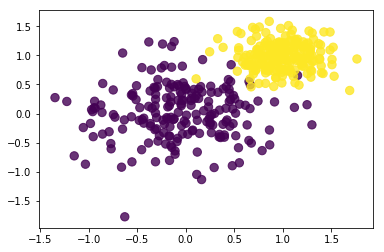

In [5]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
#Check darioliotta github!
from scipy.stats import linregress
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
data = np.load('residuals_261.npy', allow_pickle = True)
data = pd.DataFrame(data.item())
data

--2024-01-22 23:22:54--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2024-01-22 23:22:54--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc37286b9deeb47f9a01c305e9d6.dl.dropboxusercontent.com/cd/0/inline/CL1g4QJrwHUiCaITis6qq3fWVA7x6LT4ehKb9VjJ8S9TP4PBOg9uMfSIlAf8_wkGuT6am8FlFUikwcX7QbpmJeAJKrKuzg-NDWMVyIzSP0RuBp7udhaqZ9EDpr815co72yo/file# [following]
--2024-01-22 23:22:54--  https://uc37286b9deeb47f9a01c305e9d6.dl.dropboxusercontent.com/cd/0/inline/CL1g4QJrwHUiCaITis6qq3fWVA7x6LT4ehKb9VjJ8S9TP4PBOg9uMfSIlAf8_wkGuT6am8FlFUikwcX7QbpmJeAJKrKuzg-NDWMVyIzSP

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [10]:
#Cleaning the sample
data = data[data['residuals'].abs() < 2.0]
data

,residuals,distances,bin
0,1.100000,16.0,35
1,-1.950000,6.3,14
8,-0.042857,3.3,8
9,0.128571,5.3,12
10,0.085714,15.0,33
...,...,...,...
11126,-0.760000,14.4,31
11127,0.380000,7.5,17
11128,0.083333,1.7,4
11129,0.166667,19.1,42


In [11]:
#Check darioliotta github!
#Perform the linear regress 'residuals' versus 'distances'
linear_regression = linregress(data['distances'], data['residuals'])
print('Slope:', linear_regression.slope)
print('Intercept:', linear_regression.intercept)
print('R value:', linear_regression.rvalue)
print('P value:', linear_regression.pvalue)
print('Standard error of the slope', linear_regression.stderr)
print('Standard error of the intercept', linear_regression.intercept_stderr)

Slope: 0.0027853793143490986
Intercept: -0.15110782564443323
R value: 0.03672821138339419
P value: 0.00018161401825413036
Standard error of the slope 0.0007438268484182014
Standard error of the intercept 0.00849317894332349


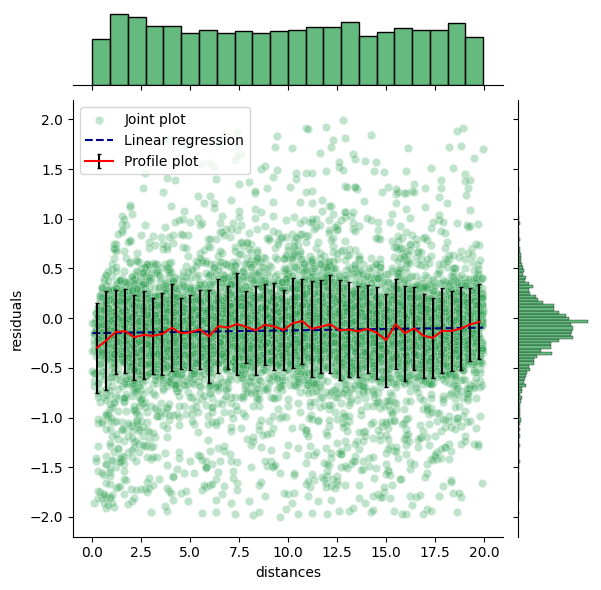

In [12]:
#Check darioliotta github!
#Joint plot
sns.jointplot(x = "distances", y = "residuals", data = data, color = '#31a354', label = 'Joint plot', alpha = 0.3)

#Plot of the linear regression line
x_axis = np.linspace(data['distances'].min(), data['distances'].max())
plt.plot(x_axis, (linear_regression.slope * x_axis) + linear_regression.intercept, linestyle = '--', color = 'darkblue', label = 'Linear regression')

#Bin numbers with Rice rule
bin_edges = np.linspace(0, 20, int(2 * (data.shape[0] ** (1/3))))

#There are some distances that are greater than 20.0, so i discard them in the bin count
data = data[data['distances'] < 20.0]

#np.digitize assigns the index of the bin to which each value belongs
bins_x = np.digitize(data["distances"], bin_edges)

#Evaluating bins' midpoints
x = (bin_edges[1:] + bin_edges[:-1]) / 2

#Adding the bin-index array evaluated with np.digitize as a new column to the dataframe
data.loc[:, 'bin'] = bins_x

#Evaluating mean and standard deviation with respect to residuals data
y = data.groupby('bin').mean()['residuals']
erry = data.groupby('bin').std()['residuals']

#Plotting errorbars
plt.errorbar(x, y, yerr = erry, color = 'r', ecolor = 'black', label = 'Profile plot', capsize = 1.5)

plt.legend()
plt.show()